In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

loading dataset and looking through the items

In [3]:
data = pd.read_csv("spotify_songs.csv")

In [4]:
print(data.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [5]:
data.shape

(32833, 23)

In [6]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

dropping the missing values

In [7]:
clean_data = data.dropna()


In [8]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [9]:
clean_data.isnull().sum()


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudne

Dropping columns our group found not useful for our recommendation system

In [11]:
clean_data.drop(['track_album_id', 'track_album_release_date', 'key', 'mode'], axis=1)

,track_id,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [12]:
print('### Numerical feature ###','\n')

clean_data.describe()

### Numerical feature ### 



,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [13]:
print('### Categorical feature ###','\n')
clean_data.describe(include=['O'])

### Categorical feature ### 



,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32828,32828,32828,32828,32828,32828,32828,32828,32828,32828
unique,28352,23449,10692,22543,19743,4529,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


In [14]:
features = clean_data[['danceability', 'energy','loudness', 'speechiness', 
                              'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]

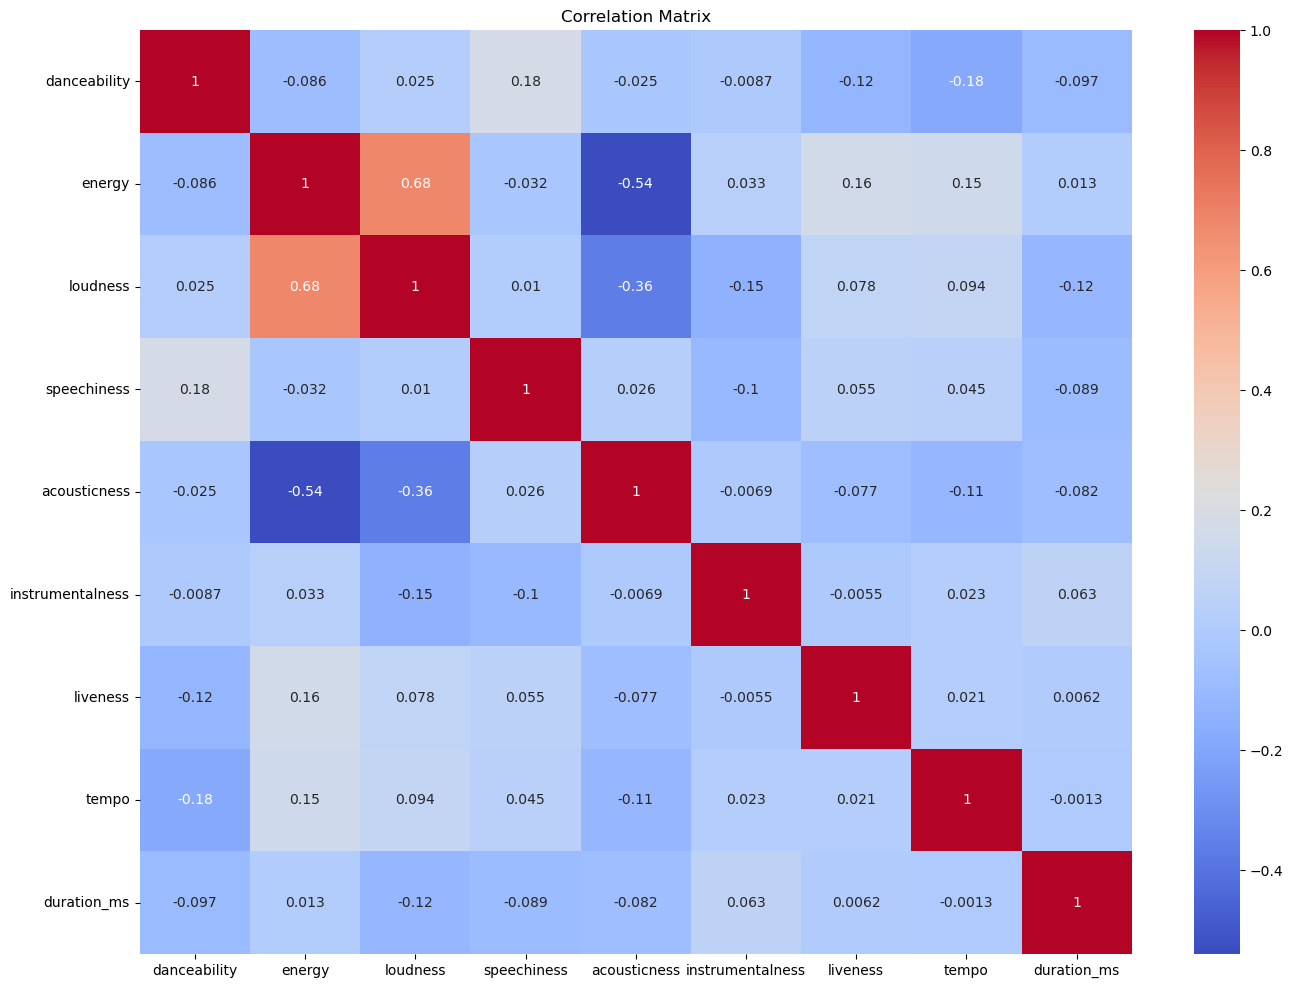

In [15]:
correlation_matrix = features.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
correlated_features = ['danceability', 'valence', 'energy', 'loudness', 
                       'acousticness', 'speechiness', 'tempo', 'liveness']

X = clean_data[correlated_features].fillna(0)

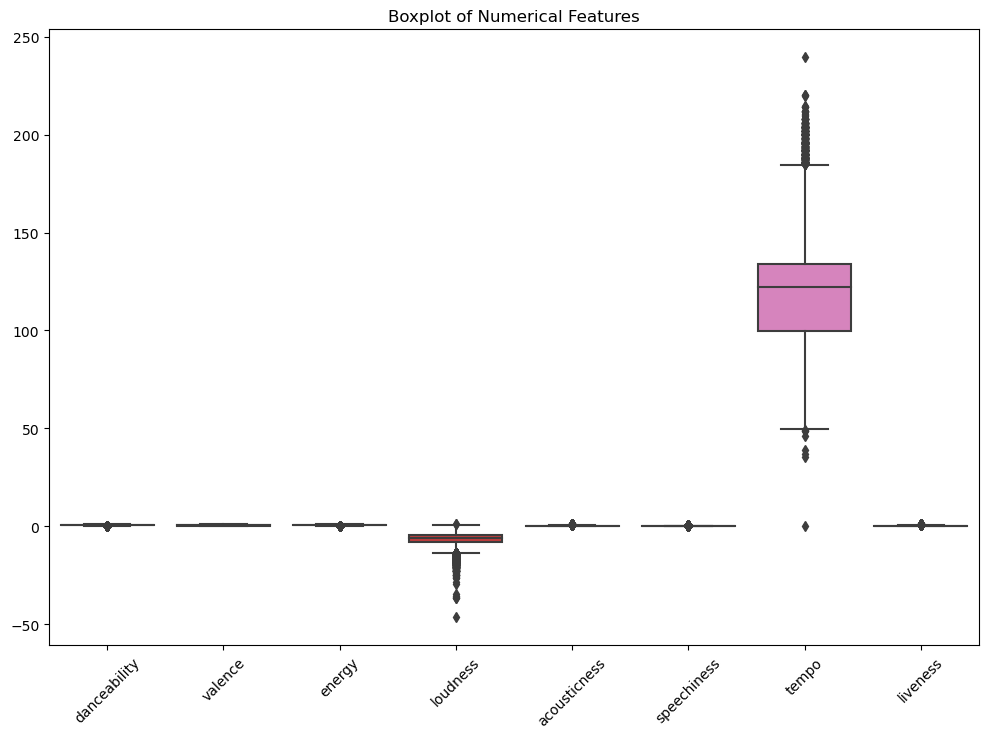

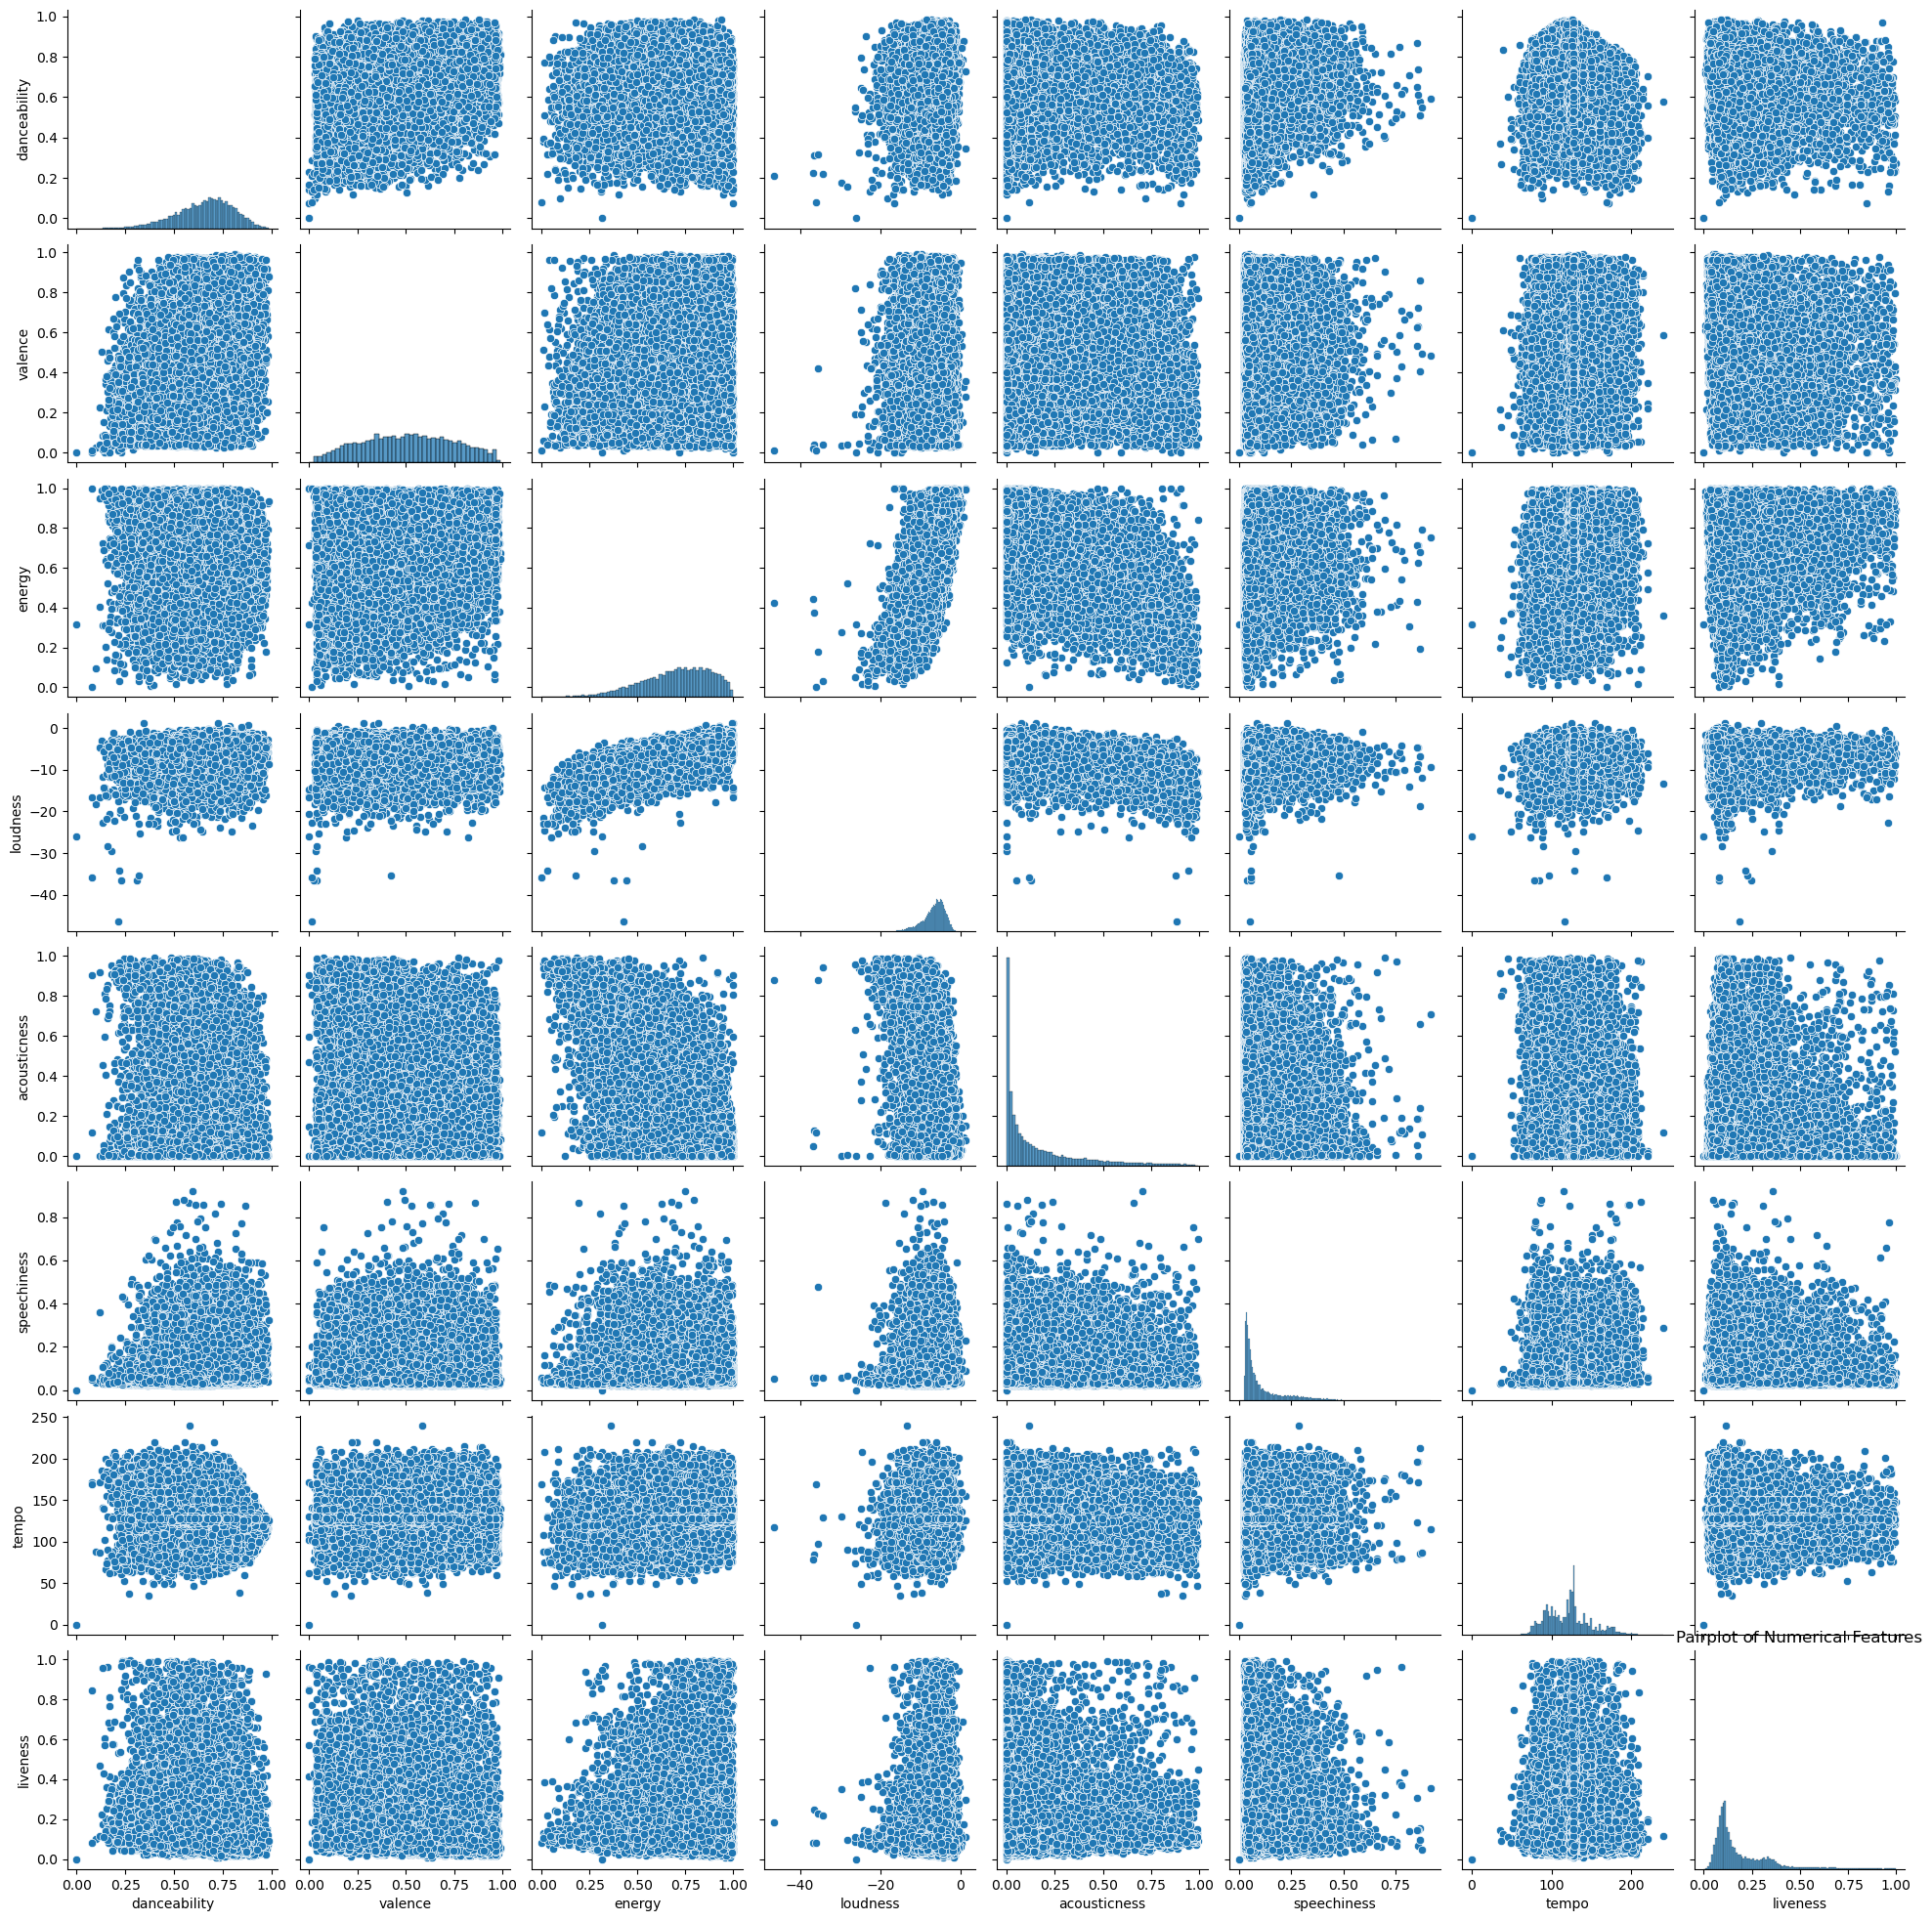

Outliers detected using Z-score:
danceability    123
valence           0
energy          166
loudness        368
acousticness    657
speechiness     618
tempo           119
liveness        831
dtype: int64
Outliers detected using IQR method:
danceability     291
valence            0
energy           277
loudness        1021
acousticness    2205
speechiness     3174
tempo            571
liveness        1842
dtype: int64


In [21]:
import seaborn as sns

# Calculate Z-score for each numerical feature
z_scores = (clean_data[correlated_features] - clean_data[correlated_features].mean()) / clean_data[correlated_features].std()

# Detect outliers using Z-score (threshold = 3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Calculate IQR for each numerical feature
Q1 = clean_data[correlated_features].quantile(0.25)
Q3 = clean_data[correlated_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers_iqr = (clean_data[correlated_features] < (Q1 - 1.5 * IQR)) | (clean_data[correlated_features] > (Q3 + 1.5 * IQR))

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=clean_data[correlated_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Visualize outliers using scatter plots
sns.pairplot(clean_data[correlated_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Print outliers detected using Z-score
print("Outliers detected using Z-score:")
print(outliers_zscore.sum())

# Print outliers detected using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


In [17]:
from sklearn.neighbors import NearestNeighbors

#Train the KNN model
k = 181  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=181)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

y = clean_data['playlist_genre']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 181  # Number of neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.3649101431617423
Precision: 0.3506696189699756
F1 Score: 0.35384594753118576


In [19]:
#implementing hyperparameter tuning using grid search to find the optimal value for the number of neighbors (k)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Define the range of values for k
    'metric': ['euclidean', 'manhattan']  # Define the distance metrics to consider
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predictions using the best model
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy, precision, and F1 score using the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15}
Accuracy: 0.40603106914407555
Precision: 0.40468049736895695
F1 Score: 0.40052234509585766
